In [2]:
# Robust word cloud generation with automatic font fallback for Vietnamese
# import os
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# # Build text from tokens (expects df['tokens'] exists)
# text = ' '.join([t for tlist in df['tokens'] for t in tlist])

# # Candidate font paths commonly present on Ubuntu
# candidate_fonts = [
#     '/usr/share/fonts/truetype/noto/NotoSansVietnamese-Regular.ttf',
#     '/usr/share/fonts/truetype/noto/NotoSans-Regular.ttf',
#     '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
# ]

# font_path = next((p for p in candidate_fonts if os.path.exists(p)), None)

# wc = WordCloud(
#     width=800,
#     height=400,
#     font_path=font_path,  # None is okay; will use PIL default if not found
#     background_color='white',
#     collocations=False,
# )

# wc = wc.generate(text)
# plt.figure(figsize=(12, 6))
# plt.imshow(wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()


## Visualize and EDA images

In [3]:
import pandas as pd

df = pd.read_csv("captions_2017_full_en_vi.csv")
df.head()

id         file_name  \
0  203564  000000203564.jpg   
1  322141  000000322141.jpg   
2   16977  000000016977.jpg   
3  106140  000000106140.jpg   
4  106140  000000106140.jpg   

                                          flickr_url  \
0  http://farm8.staticflickr.com/7366/9643253026_...   
1  http://farm8.staticflickr.com/7026/6388965173_...   
2  http://farm8.staticflickr.com/7003/6528937031_...   
3  http://farm6.staticflickr.com/5207/5304302785_...   
4  http://farm6.staticflickr.com/5207/5304302785_...   

                                            coco_url  height  width  image_id  \
0  http://images.cocodataset.org/train2017/000000...     400    400    203564   
1  http://images.cocodataset.org/train2017/000000...     480    640    322141   
2  http://images.cocodataset.org/train2017/000000...     480    640     16977   
3  http://images.cocodataset.org/train2017/000000...     480    640    106140   
4  http://images.cocodataset.org/train2017/000000...     480    640    106140   

   id_anno                                            caption  \
0       37  A bicycle replica with a clock as the front wh...   
1       49  A room with blue walls and a white sink and door.   
2       89  A car that seems to be parked illegally behind...   
3       98  A large passenger airplane flying through the ...   
4      101  There is a GOL plane taking off in a partly cl...   

                                       caption_trans  
0  Một bản sao xe đạp với một chiếc đồng hồ làm b...  
1  Một căn phòng với những bức tường màu xanh và ...  
2  Một chiếc xe dường như được đậu bất hợp pháp đ...  
3  Một chiếc máy bay chở khách lớn đang bay trên ...  
4  Có một chiếc máy bay GOL cất cánh trên bầu trờ...

In [2]:
df.shape

(616767, 10)

In [3]:
df["image_id"].nunique()

123287

In [6]:
# test_df = df[df["image_id"] == 179765]
# test_df

In [4]:
#Create a dict that save the key as the image_url and the value as the captions in english and vietnamese
import numpy as np
ids_to_save = np.random.choice(df['image_id'].unique(), size=120000, replace=False)
ids_to_save

image_caption_dict = {}
for image_id in ids_to_save:
    image_rows = df[df['image_id'] == image_id]
    
    image_url = image_rows.iloc[0]['coco_url']
    
    english_captions = image_rows['caption'].tolist()
    vietnamese_captions = image_rows['caption_trans'].tolist()
    
    image_caption_dict[image_url] = {
        'english': english_captions,
        'vietnamese': vietnamese_captions,
        'image_id': image_id
    }

image_caption_dict

{'http://images.cocodataset.org/train2017/000000012169.jpg': {'english': ['A cup of coffee in a front of a oven.',
   "A full view of a oven with a man's reflection. ",
   'A person has a reflection in an oven near a cup.',
   'An oven with a relflection of a person in the glass',
   'An oven with something cooking inside of it.'],
  'vietnamese': ['Một tách cà phê trước lò nướng.',
   'Một cái nhìn toàn cảnh của một lò nướng với hình ảnh phản chiếu của một người đàn ông.',
   'Một người có hình phản chiếu trong lò nướng gần một cái cốc.',
   'Một lò nướng với một người trong kính',
   'Một cái lò nướng với thứ gì đó đang nấu bên trong.'],
  'image_id': np.int64(12169)},
 'http://images.cocodataset.org/train2017/000000144438.jpg': {'english': ['Two people with pizzas on a picnic table outdoors.',
   'People are holding small pizzas at an outdoor part.',
   'Man and woman wearing sunglasses, holding pizza at a picnic table.',
   'Man and woman setting out pizza on a picnic table.',
   '

In [5]:
#Save it as a json file
import json
import numpy as np

def convert_numpy_types(obj):
    if isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    return obj

json_serializable_dict = {}
for image_url, captions in image_caption_dict.items():
    json_serializable_dict[image_url] = {
        'english': [convert_numpy_types(caption) for caption in captions['english']],
        'vietnamese': [convert_numpy_types(caption) for caption in captions['vietnamese']],
        'image_id': convert_numpy_types(captions['image_id'])
    }

# Save with UTF-8 encoding
with open('120000_image_caption_dict.json', 'w', encoding='utf-8') as f:
    json.dump(json_serializable_dict, f, ensure_ascii=False, indent=2)

print("Image caption dictionary saved to 120000_image_caption_dict.json")

Image caption dictionary saved to 120000_image_caption_dict.json


In [14]:
#Take the first 10 rows to visualize
df_visualize = df.sample(16)
df_visualize

id         file_name  \
10326   419401  000000419401.jpg   
328916  545804  000000545804.jpg   
424024  520256  000000520256.jpg   
102452  230598  000000230598.jpg   
399798    5483  000000005483.jpg   
294013  525898  000000525898.jpg   
132038  241934  000000241934.jpg   
193569  385674  000000385674.jpg   
224948  132850  000000132850.jpg   
62007   229342  000000229342.jpg   
176798  309662  000000309662.jpg   
333392  315517  000000315517.jpg   
278526  332038  000000332038.jpg   
16410   361497  000000361497.jpg   
407499  164941  000000164941.jpg   
53693   566699  000000566699.jpg   

                                               flickr_url  \
10326   http://farm5.staticflickr.com/4082/4775546654_...   
328916  http://farm6.staticflickr.com/5051/5492550939_...   
424024  http://farm4.staticflickr.com/3069/2709831906_...   
102452  http://farm4.staticflickr.com/3347/3415752610_...   
399798  http://farm3.staticflickr.com/2201/5712664548_...   
294013  http://farm4.staticflickr.com/3193/3041437618_...   
132038  http://farm9.staticflickr.com/8099/8545095912_...   
193569  http://farm8.staticflickr.com/7171/6393410779_...   
224948  http://farm6.staticflickr.com/5178/5565187760_...   
62007   http://farm1.staticflickr.com/30/38436160_4265...   
176798  http://farm8.staticflickr.com/7020/6757451829_...   
333392  http://farm6.staticflickr.com/5157/5824374680_...   
278526  http://farm4.staticflickr.com/3481/3458555698_...   
16410   http://farm6.staticflickr.com/5336/9482856284_...   
407499  http://farm9.staticflickr.com/8123/8677647388_...   
53693   http://farm5.staticflickr.com/4083/4969111875_...   

                                                 coco_url  height  width  \
10326   http://images.cocodataset.org/train2017/000000...     480    640   
328916  http://images.cocodataset.org/train2017/000000...     640    478   
424024  http://images.cocodataset.org/train2017/000000...     428    640   
102452  http://images.cocodataset.org/train2017/000000...     428    640   
399798  http://images.cocodataset.org/train2017/000000...     568    640   
294013  http://images.cocodataset.org/train2017/000000...     340    640   
132038  http://images.cocodataset.org/train2017/000000...     612    612   
193569  http://images.cocodataset.org/train2017/000000...     480    640   
224948  http://images.cocodataset.org/train2017/000000...     612    612   
62007   http://images.cocodataset.org/train2017/000000...     480    640   
176798  http://images.cocodataset.org/train2017/000000...     427    640   
333392  http://images.cocodataset.org/train2017/000000...     428    640   
278526  http://images.cocodataset.org/train2017/000000...     480    640   
16410   http://images.cocodataset.org/train2017/000000...     640    427   
407499  http://images.cocodataset.org/train2017/000000...     640    412   
53693   http://images.cocodataset.org/train2017/000000...     427    640   

        image_id  id_anno                                            caption  \
10326     419401   293786  an image of a train that has a bike sign on th...   
328916    545804   511160  A gray cat wit ha blue leash starring into the...   
424024    520256   428863  Chicken parmesan with a medley of vegetables o...   
102452    230598   467765       A man is selling bananas from a street cart.   
399798      5483   651541  This restaurant has fresh fruit displayed at a...   
294013    525898   461212  A young boy sitting at a table right next to a...   
132038    241934   499042  A dozen glazed pastries each different and eac...   
193569    385674   404494  A kitchen filled with a stove, sink, cabinets,...   
224948    132850   363860  A view of an air plane jet liner through a win...   
62007     229342   137095  A large tan dog sleeping on a gray carpet in f...   
176798    309662   702375           A woman is posing with a glass of wine.    
333392    315517   623118             a cat is laying on top of a television   
278526    332038    68752  A

In [15]:
df_visualize.iloc[0, 2]

'http://farm5.staticflickr.com/4082/4775546654_ae43259c48_z.jpg'

In [16]:
#Create a dictionary to map image url and image caption in vietnamese
image_caption_dict = {}
for index, row in df_visualize.iterrows():
    if index != 8:
        captions = []
        image_url = row['coco_url']
        image_caption_en = row['caption']
        image_caption_vi = row['caption_trans']
        if not image_caption_en.startswith('Banana'):
            captions.append(image_caption_en)
            captions.append(image_caption_vi)
            image_caption_dict[image_url] = captions
image_caption_dict

{'http://images.cocodataset.org/train2017/000000419401.jpg': ['an image of a train that has a bike sign on the side',
  'Một hình ảnh của một chuyến tàu có biển báo xe đạp ở bên cạnh.'],
 'http://images.cocodataset.org/train2017/000000545804.jpg': ['A gray cat wit ha blue leash starring into the camera.',
  'Một con mèo xám wit ha dây xích màu xanh đóng vai chính vào máy ảnh.'],
 'http://images.cocodataset.org/train2017/000000520256.jpg': ['Chicken parmesan with a medley of vegetables on a plate.',
  'Parmesan gà với một hỗn hợp rau trên đĩa.'],
 'http://images.cocodataset.org/train2017/000000230598.jpg': ['A man is selling bananas from a street cart.',
  'Một người đàn ông đang bán chuối từ một chiếc xe đẩy đường phố.'],
 'http://images.cocodataset.org/train2017/000000005483.jpg': ['This restaurant has fresh fruit displayed at a counter.',
  'Nhà hàng này có trái cây tươi được trưng bày tại quầy.'],
 'http://images.cocodataset.org/train2017/000000525898.jpg': ['A young boy sitting at 

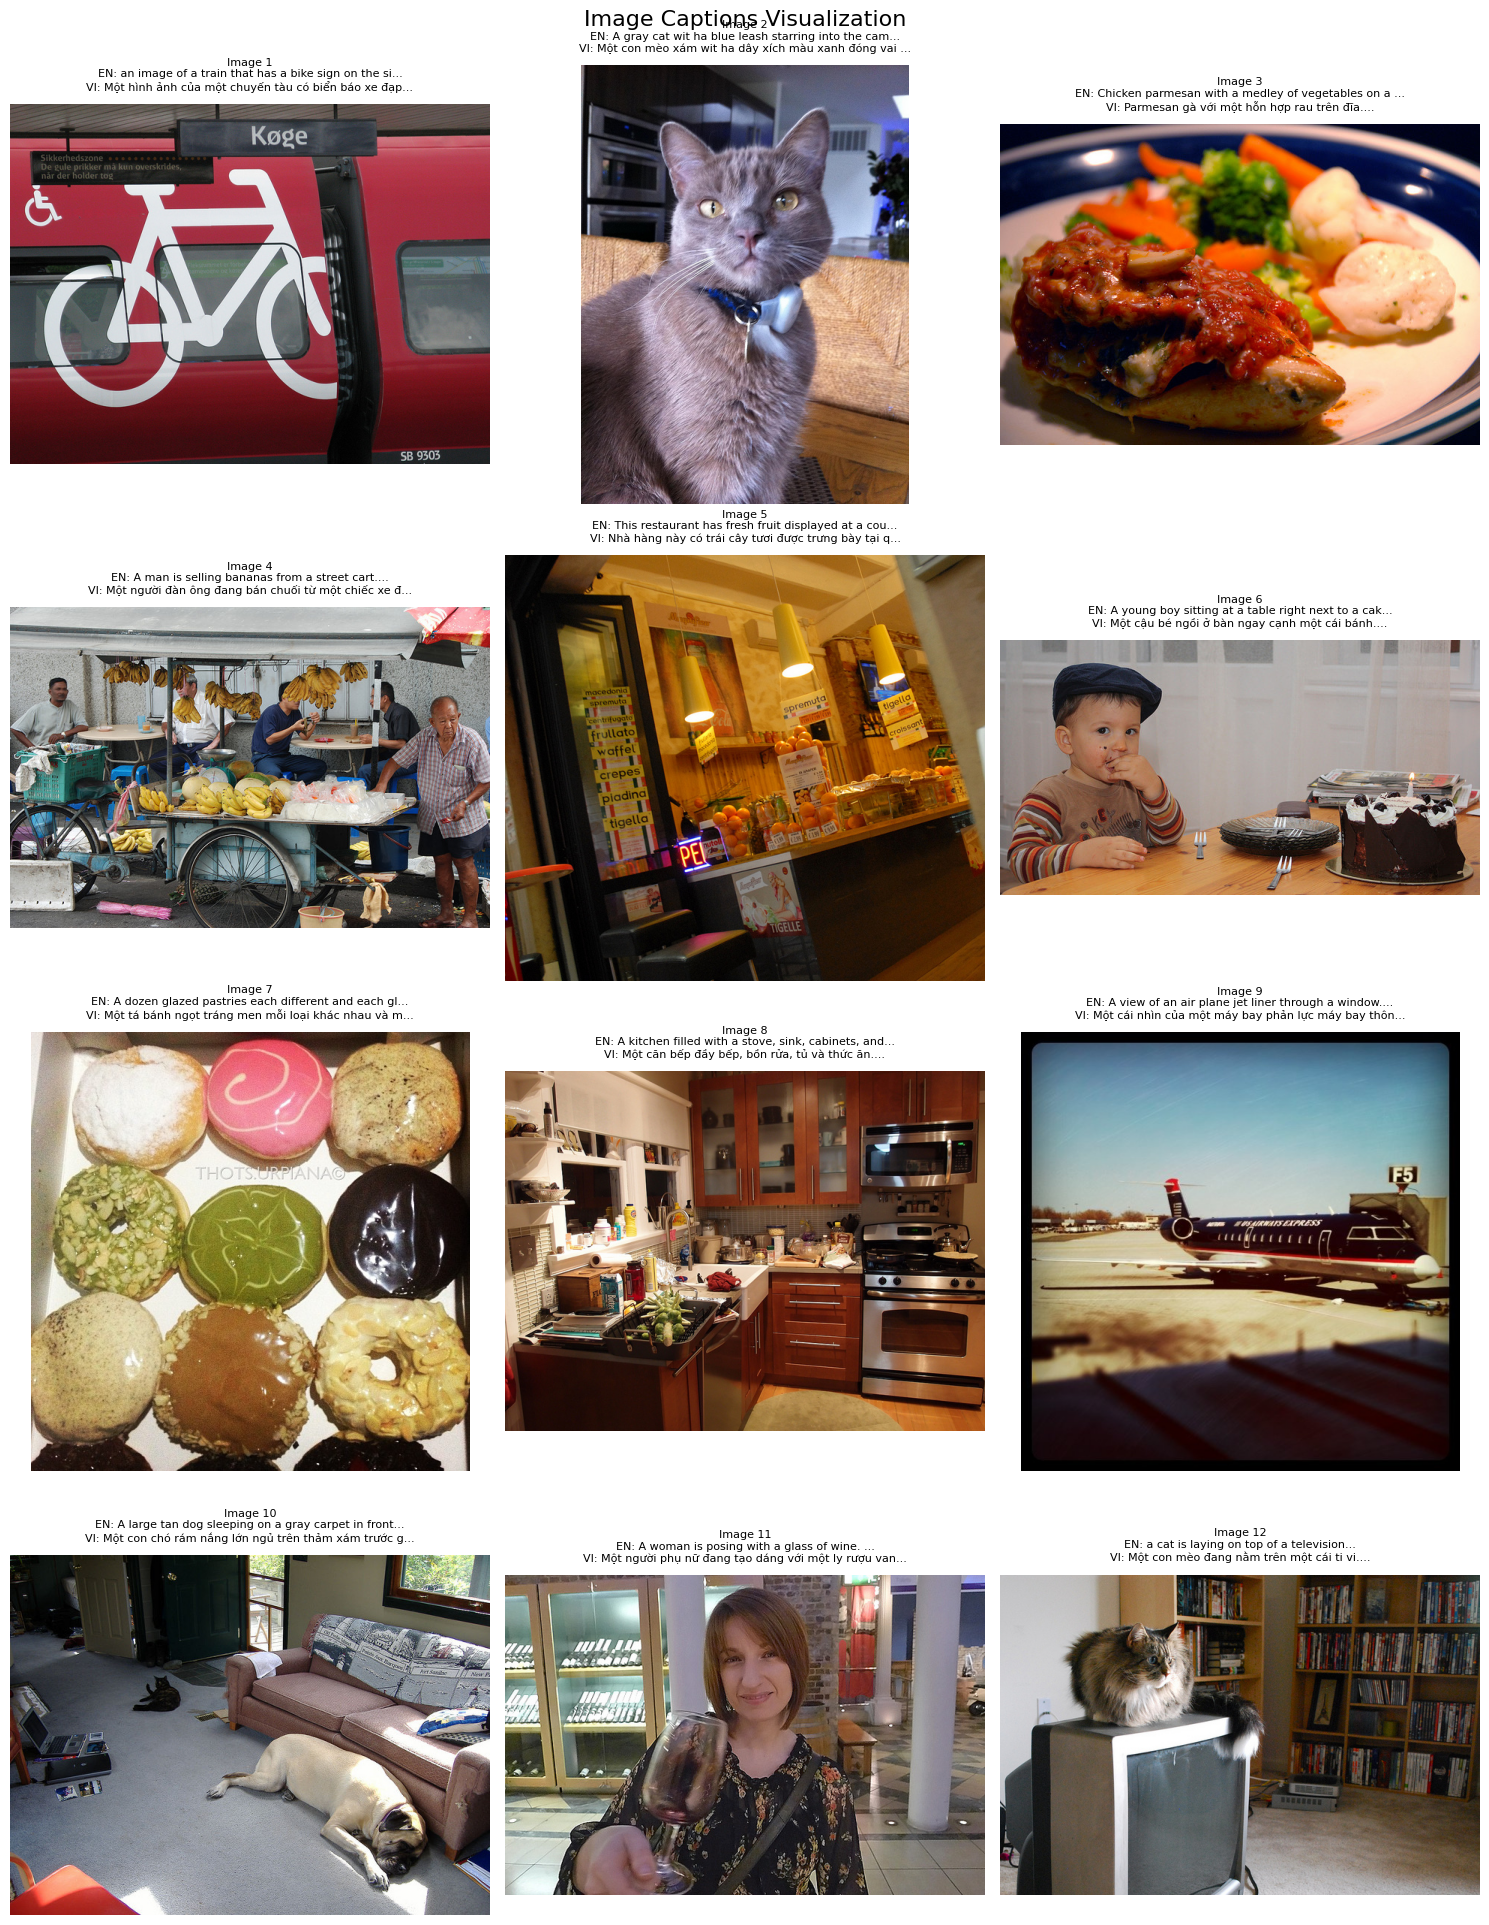

In [17]:
#visualize the image by url and display with the corresponding captions
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig.suptitle('Image Captions Visualization', fontsize=16)

axes = axes.flatten()

image_items = list(image_caption_dict.items())[:12]

for i, (image_url, captions) in enumerate(image_items):
    try:
        response = requests.get(image_url)
        image = Image.open(io.BytesIO(response.content))
        
        axes[i].imshow(image)
        axes[i].set_title(f"Image {i+1}\nEN: {captions[0][:50]}...\nVI: {captions[1][:50]}...", 
                         fontsize=8, pad=10)
        axes[i].axis('off')
        
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Error loading image {i+1}:\n{str(e)}", 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].axis('off')

for i in range(len(image_items), 12):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [4]:
df.columns

Index(['id', 'file_name', 'flickr_url', 'coco_url', 'height', 'width',
       'image_id', 'id_anno', 'caption', 'caption_trans'],
      dtype='object')

In [5]:
#Visualize the distribution of caption length in English
from underthesea import word_tokenize
def tokenize_vi(s):
    return word_tokenize(s, format='text')

df['tokenized'] = df['caption_trans'].apply(lambda s: tokenize_vi(s))
df['tokens'] = df['tokenized'].apply(lambda s: s.split())
df.head()

id         file_name  \
0  203564  000000203564.jpg   
1  322141  000000322141.jpg   
2   16977  000000016977.jpg   
3  106140  000000106140.jpg   
4  106140  000000106140.jpg   

                                          flickr_url  \
0  http://farm8.staticflickr.com/7366/9643253026_...   
1  http://farm8.staticflickr.com/7026/6388965173_...   
2  http://farm8.staticflickr.com/7003/6528937031_...   
3  http://farm6.staticflickr.com/5207/5304302785_...   
4  http://farm6.staticflickr.com/5207/5304302785_...   

                                            coco_url  height  width  image_id  \
0  http://images.cocodataset.org/train2017/000000...     400    400    203564   
1  http://images.cocodataset.org/train2017/000000...     480    640    322141   
2  http://images.cocodataset.org/train2017/000000...     480    640     16977   
3  http://images.cocodataset.org/train2017/000000...     480    640    106140   
4  http://images.cocodataset.org/train2017/000000...     480    640    106140   

   id_anno                                            caption  \
0       37  A bicycle replica with a clock as the front wh...   
1       49  A room with blue walls and a white sink and door.   
2       89  A car that seems to be parked illegally behind...   
3       98  A large passenger airplane flying through the ...   
4      101  There is a GOL plane taking off in a partly cl...   

                                       caption_trans  \
0  Một bản sao xe đạp với một chiếc đồng hồ làm b...   
1  Một căn phòng với những bức tường màu xanh và ...   
2  Một chiếc xe dường như được đậu bất hợp pháp đ...   
3  Một chiếc máy bay chở khách lớn đang bay trên ...   
4  Có một chiếc máy bay GOL cất cánh trên bầu trờ...   

                                           tokenized  \
0  Một bản_sao xe_đạp với một chiếc đồng_hồ làm b...   
1  Một căn phòng với những bức tường màu xanh và ...   
2  Một chiếc xe dường_như được đậu bất_hợp_pháp đ...   
3  Một chiếc máy_bay chở khách lớn đang bay trên ...   
4  Có một chiếc máy_bay GOL cất_cánh trên bầu_trờ...   

                                              tokens  
0  [Một, bản_sao, xe_đạp, với, một, chiếc, đồng_h...  
1  [Một, căn, phòng, với, những, bức, tường, màu,...  
2  [Một, chiếc, xe, dường_như, được, đậu, bất_hợp...  
3  [Một, chiếc, máy_bay, chở, khách, lớn, đang, b...  
4  [Có, một, chiếc, máy_bay, GOL, cất_cánh, trên,...

In [6]:
import re
import string

VI_STOPWORDS = {
    'là','và','của','có','những','các','một','như','được','trong','khi','đã','với','cho','từ','này','nên','rằng','đến','để','cũng','rất','không','thì','về','hay','hoặc','nơi','này','kia','đó','vì','bị','bằng','theo','sau','trên','dưới','giữa','qua','tại','nếu','vẫn','vừa','đang','sẽ','nữa','đều','nào','nhiều','ít','hết','hơn','kém','lúc','nơi','người','cái','việc','vậy','thế','nhiên','do','ra','vào','lại','đi','đến','cùng','cả','mỗi','mọi','ai','gì','đâu','đấy','ấy','ta','tôi','anh','chị','em','ông','bà','cô','chú','bác','các','những','nhưng','hay','hoặc','vẫn','nên','sao','tại sao','vì sao','đó','này','kia','ấy','rồi','nữa','được','bị','qua','hầu như','gần như','chỉ','rất','khá','hơi','đều','cũng','đã','đang','sẽ','vừa','mới','thật','thì','là','lắm','cực','cực kỳ','siêu','cực kì'
}

EXTRA_PUNCTS = '“”‘’…–—−·•°²³±≈≤≥‰÷×➔→←↑↓✅❌✔️✖️'
PUNCT_TABLE = str.maketrans('', '', string.punctuation + EXTRA_PUNCTS)

LETTER_RE = re.compile(r'^[^\W\d_]+$', re.UNICODE)


def clean_vi_token(token: str) -> str:
    t = token.lower().translate(PUNCT_TABLE)
    t = t.strip()
    if not t or not LETTER_RE.match(t):
        return ''
    if len(t) <= 1:
        return ''
    if t in VI_STOPWORDS:
        return ''
    return t


def clean_vi_tokens(tokens):
    cleaned = []
    for tok in tokens:
        ct = clean_vi_token(tok)
        if ct:
            cleaned.append(ct)
    return cleaned

df['tokens_clean'] = df['tokens'].apply(clean_vi_tokens)
df[['caption_trans','tokens','tokens_clean']].head()


caption_trans  \
0  Một bản sao xe đạp với một chiếc đồng hồ làm b...   
1  Một căn phòng với những bức tường màu xanh và ...   
2  Một chiếc xe dường như được đậu bất hợp pháp đ...   
3  Một chiếc máy bay chở khách lớn đang bay trên ...   
4  Có một chiếc máy bay GOL cất cánh trên bầu trờ...   

                                              tokens  \
0  [Một, bản_sao, xe_đạp, với, một, chiếc, đồng_h...   
1  [Một, căn, phòng, với, những, bức, tường, màu,...   
2  [Một, chiếc, xe, dường_như, được, đậu, bất_hợp...   
3  [Một, chiếc, máy_bay, chở, khách, lớn, đang, b...   
4  [Có, một, chiếc, máy_bay, GOL, cất_cánh, trên,...   

                                        tokens_clean  
0   [bảnsao, xeđạp, chiếc, đồnghồ, làm, bánh, trước]  
1  [căn, phòng, bức, tường, màu, xanh, bồnrửa, cử...  
2  [chiếc, xe, dườngnhư, đậu, bấthợppháp, đằng, c...  
3              [chiếc, máybay, chở, khách, lớn, bay]  
4  [chiếc, máybay, gol, cấtcánh, bầutrời, phần, mây]

count    616767.000000
mean          6.963677
std           2.196210
min           0.000000
5%            4.000000
25%           5.000000
50%           7.000000
75%           8.000000
95%          11.000000
max          42.000000
Name: caption_length_clean, dtype: float64


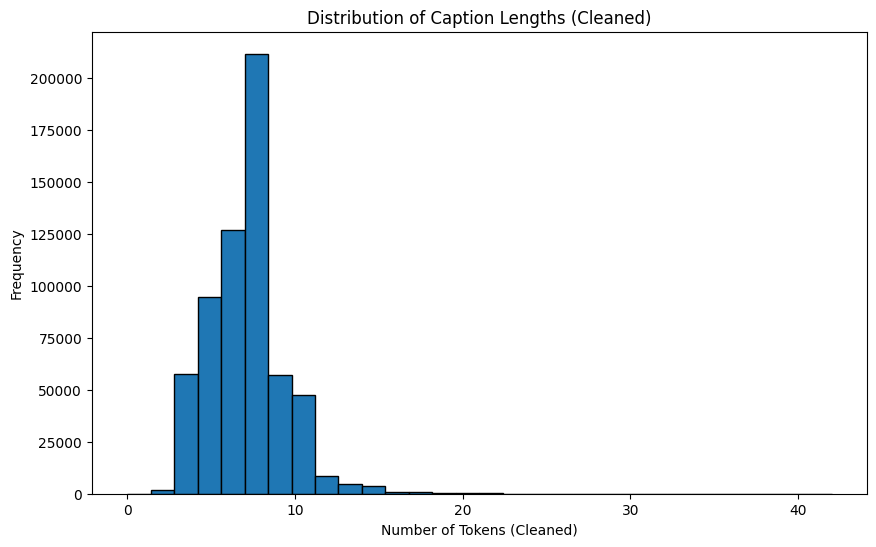

In [7]:
# Recompute caption length using cleaned tokens
import matplotlib.pyplot as plt

df['caption_length_clean'] = df['tokens_clean'].apply(len)
print(df['caption_length_clean'].describe(percentiles=[.05,.25,.5,.75,.95]))

plt.figure(figsize=(10,6))
plt.hist(df['caption_length_clean'], bins=30, edgecolor='black')
plt.title('Distribution of Caption Lengths (Cleaned)')
plt.xlabel('Number of Tokens (Cleaned)')
plt.ylabel('Frequency')
plt.show()


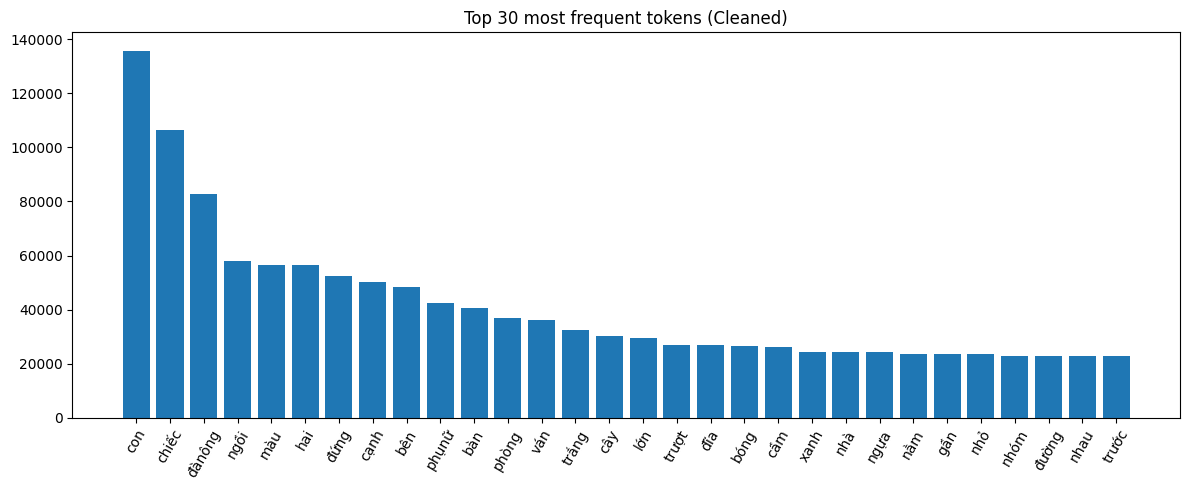

In [8]:
# Top frequent tokens after cleaning
from collections import Counter
all_tokens_clean = Counter()
for tokens in df['tokens_clean']:
    all_tokens_clean.update(tokens)

most_common_clean = all_tokens_clean.most_common(30)
words_c, counts_c = zip(*most_common_clean) if most_common_clean else ([], [])
plt.figure(figsize=(12,5))
plt.bar(range(len(words_c)), counts_c)
plt.xticks(range(len(words_c)), words_c, rotation=60)
plt.title('Top 30 most frequent tokens (Cleaned)')
plt.tight_layout()
plt.show()


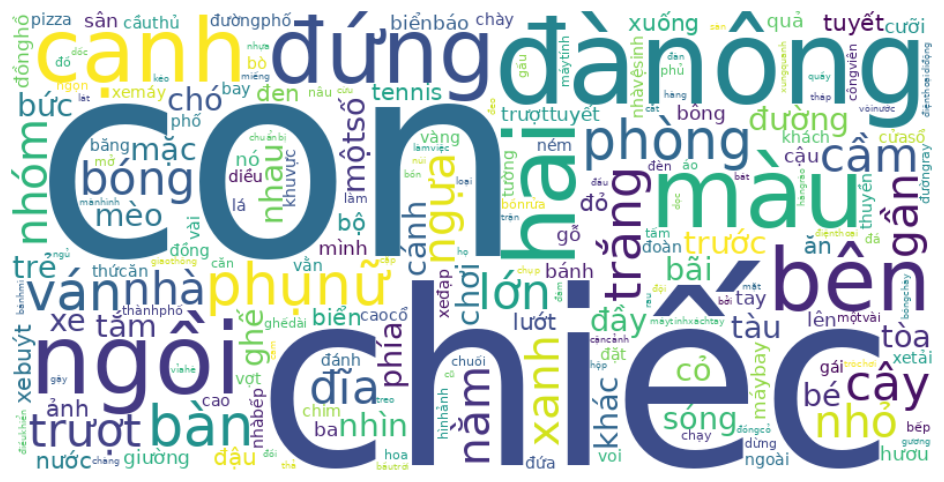

In [9]:
# Word cloud using cleaned tokens with Vietnamese font fallback
import os
from wordcloud import WordCloud

text_clean = ' '.join([t for tlist in df['tokens_clean'] for t in tlist])

candidate_fonts = [
    '/usr/share/fonts/truetype/noto/NotoSansVietnamese-Regular.ttf',
    '/usr/share/fonts/truetype/noto/NotoSans-Regular.ttf',
    '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
]
font_path = next((p for p in candidate_fonts if os.path.exists(p)), None)

wc = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False,
)

wc = wc.generate(text_clean)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


count    616767.000000
mean         11.931452
std           3.247452
min           3.000000
5%            8.000000
25%          10.000000
50%          11.000000
75%          13.000000
95%          18.000000
max          70.000000
Name: caption_length, dtype: float64


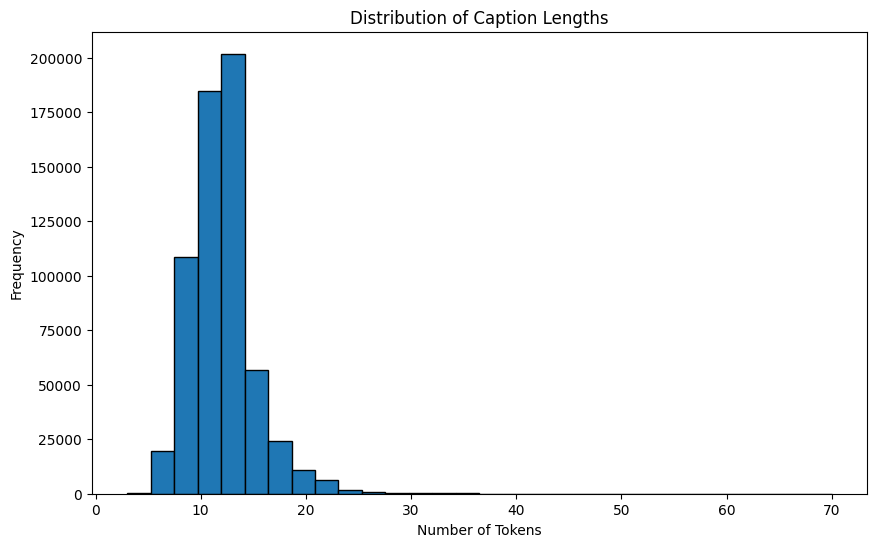

In [21]:
df['caption_length'] = df['tokens'].apply(len)
print(df['caption_length'].describe(percentiles=[.05,.25,.5,.75,.95]))

plt.figure(figsize=(10,6))
plt.hist(df['caption_length'], bins=30, edgecolor='black')
plt.title('Distribution of Caption Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


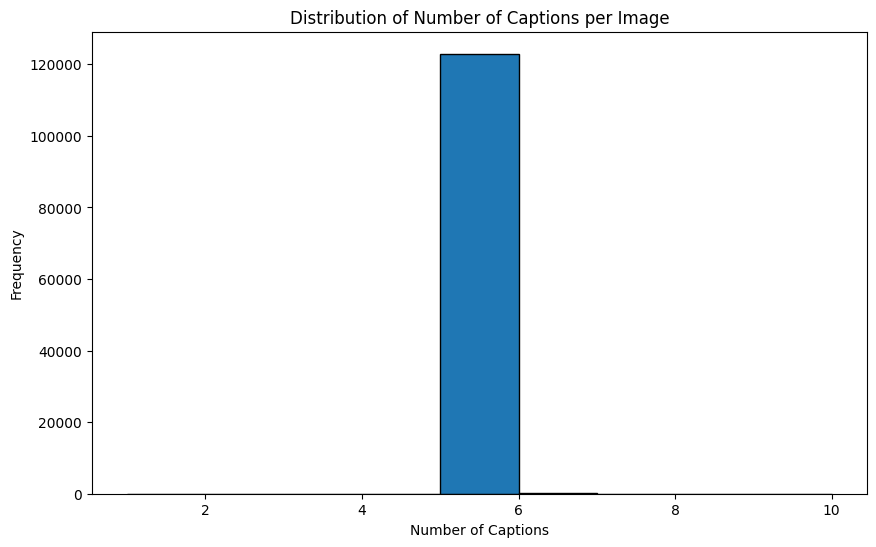

In [22]:
#Visualize number of coptions per image
counts = df.groupby('image_id').size()
counts.value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.hist(counts, bins=range(1, 11), edgecolor='black')
plt.title('Distribution of Number of Captions per Image')
plt.xlabel('Number of Captions')
plt.ylabel('Frequency')
plt.show()


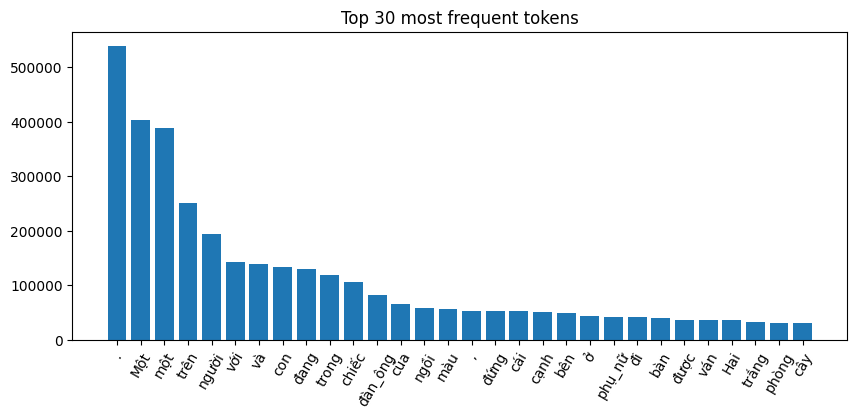

In [ ]:
#Display the most frequent tokens
from collections import Counter
all_tokens = Counter()
for tokens in df['tokens']:
    all_tokens.update(tokens)

most_common = all_tokens.most_common(30)
words, counts = zip(*most_common)
plt.figure(figsize=(10,4))
plt.bar(range(len(words)), counts)
plt.xticks(range(len(words)), words, rotation=60)
plt.title('Top 30 most frequent tokens')
plt.show()

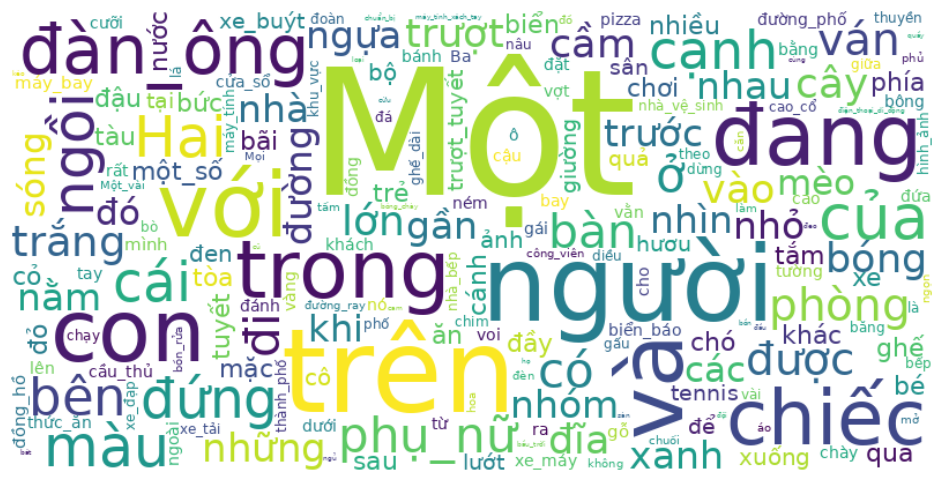

In [ ]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([t for tlist in df['tokens'] for t in tlist])

# Candidate font paths commonly present on Ubuntu
candidate_fonts = [
    '/usr/share/fonts/truetype/noto/NotoSansVietnamese-Regular.ttf',
    '/usr/share/fonts/truetype/noto/NotoSans-Regular.ttf',
    '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
]

font_path = next((p for p in candidate_fonts if os.path.exists(p)), None)

wc = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False,
)

wc = wc.generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()